### expit function을 사용한 sigmoid function

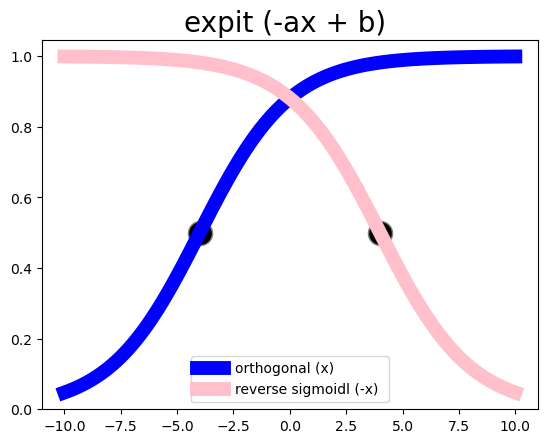

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.special import expit


a, b = 0.5, 2

x = np.linspace(-10, 10, 121)

plt.plot(x, expit(a*x + b), linewidth=10, color = "blue", label = "orthogonal (x) ")
plt.scatter(-b/a, expit (0), s = 300, color = "black", marker = "o", edgecolors ="gray")

plt.plot(x, expit(-a*x + b), linewidth=10, color = "pink", label = "reverse sigmoidl (-x) ")
plt.scatter(b/a, expit (0), s = 300, color = "black", marker = "o", edgecolors ="gray")

plt.title('expit (-ax + b) ', fontsize = 20)
plt.legend()
plt.show()


### 전통적인 sigmoid function expression

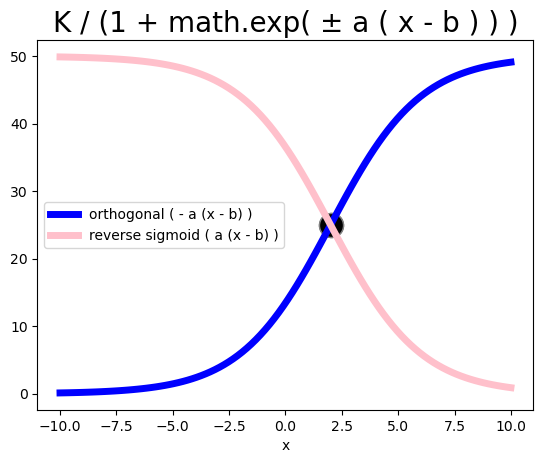

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.special import expit

a, b, K = 0.5, 2 , 50

def sigmoid(x):
  return (K / (1 + math.exp(-a * (x - b))))
def rev_sigmoid(x):
  return (K / (1 + math.exp(a*(x - b))) )

x= np.linspace(-10,10,100)

plt.scatter(b, sigmoid(b), s = 300, color = "black", marker = "o", edgecolors ="gray")
plt.plot(x,np.vectorize(sigmoid)(x), linewidth=5, color = "blue", label = "orthogonal ( - a (x - b) ) ")

plt.scatter(b, rev_sigmoid( b ), s = 300, color = "black", marker = "o", edgecolors ="gray")
plt.plot(x,np.vectorize(rev_sigmoid)(x), linewidth=5, color = "pink", label = "reverse sigmoid ( a (x - b) )")


#plt.xlim(-3, 20)
plt.xlabel('x')
plt.title('K / (1 + math.exp( ± a ( x - b ) ) )', fontsize = 20)
plt.legend()
plt.show()

In [1]:
import pandas as pd

df = pd.read_csv("fitting_MRS_FPratio_0.1.data", header=None,  delim_whitespace=True)

df.columns = ["x", "y"]

#df2 = pd.concat ( [pd.DataFrame ([ {"x":0, "y": 60}, {"x":0, "y": 55}, {"x":0, "y": 50} ] , index = [0, 1, 2]), df] ).reset_index (drop = True)  # 맨 위에 (0,60 하나 끼워넣기)
# df2 = pd.concat ( [pd.DataFrame ([ {"x":0, "y": 60},  {"x":0, "y": 50} ] , index = [0, 1]), df] ).reset_index (drop = True)  # 맨 위에 (0,60 하나 끼워넣기)
# df2 ["x"] = df2.index
# df = df2[0:20]
df = df[0:100]
df.head(5)

,x,y
0,0,100.0
1,1,100.0
2,2,100.0
3,3,100.0
4,4,100.0


## Fitting 하기

popt = [0.62878049 8.26711125]
pcov=[[5.18431320e-03 3.61547855e-06]
 [3.61547855e-06 4.27359329e-02]]


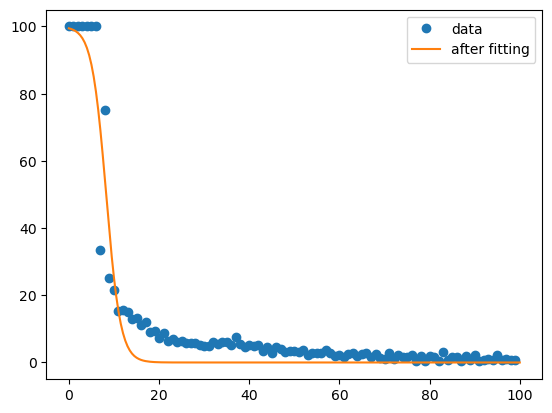

In [156]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def fsigmoid(x, a, b):
    return df.iloc[0]["y"]  / (1.0 + np.exp(a*(x-b)))

#popt, pcov = curve_fit ( fsigmoid, df["x"], df["y"], method='trf', bounds=([29, 5], [40, 15]) )          #  ([low_a,low_b],[high_a,high_b])    # b : inflection point 의 x값
popt, pcov = curve_fit ( fsigmoid, df["x"], df["y"], method='lm' )         

print ("popt = {}\npcov={}".format(popt, pcov))

x = np.linspace(0, 100, 201)
y = fsigmoid(x, *popt)

plt.plot(df["x"], df["y"], 'o', label='data')
plt.plot(x,y, label="after fitting" )
#plt.ylim(0, 1.3)
plt.legend(loc='best')

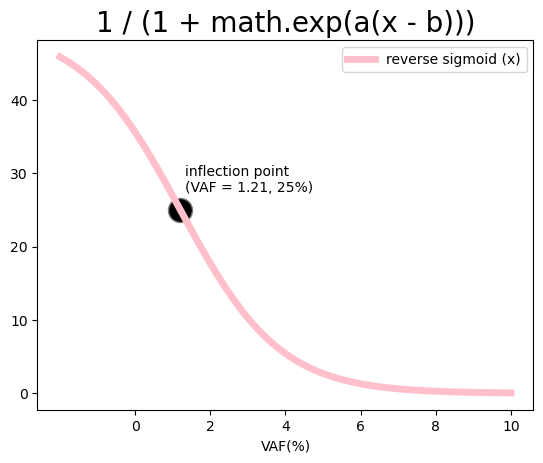

In [148]:
a,b  = popt[0], popt[1]

x= np.linspace(-2,10,100)

plt.scatter( b, rev_sigmoid( b ), s = 300, color = "black", marker = "o", edgecolors ="gray" )
plt.text ( b * 1.1 , rev_sigmoid( b ) * 1.1 , "inflection point\n(VAF = {}, {}%)".format (round (b, 2) , round(0.5 * K)) ) 
plt.plot(x,np.vectorize(rev_sigmoid)(x), linewidth=5, color = "pink", label = "reverse sigmoid (x)")


#plt.xlim(-3, 20)
plt.xlabel( "VAF(%)" )
plt.title('1 / (1 + math.exp(a(x - b)))', fontsize = 20)
plt.legend()
plt.xticks ([0, 2, 4, 6, 8, 10])
plt.show()

In [33]:
from scipy.special import expit

print ( expit( 1 )) 


0.7310585786300049


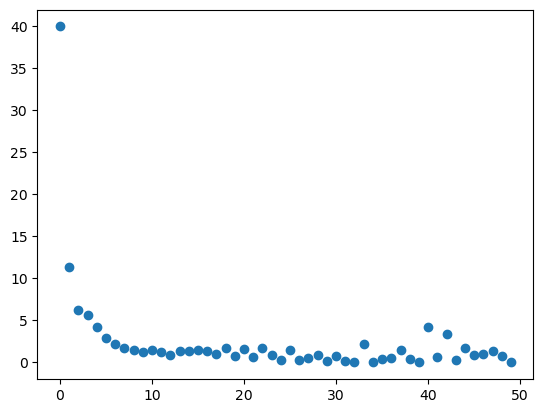

In [26]:
plt.plot(df["x"], df["y"], 'o', label='data')

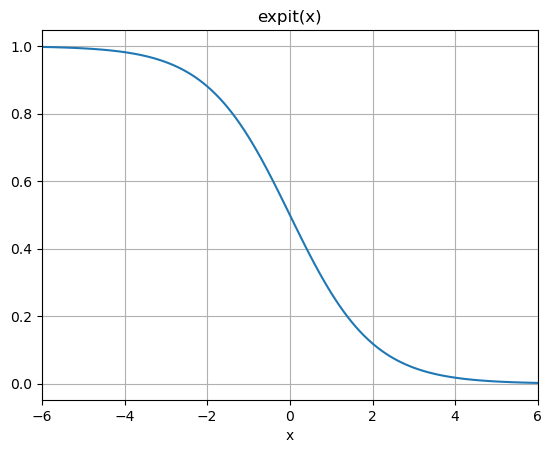

In [36]:
from scipy.special import expit, logit

import matplotlib.pyplot as plt
x = np.linspace(-6, 6, 121)
y = 1 - expit(x)
#return (1 - expit( 50*x - 5)) * 0.5
plt.plot(x, y)
plt.grid()
plt.xlim(-6, 6)
plt.xlabel('x')
plt.title('expit(x)')
plt.show()